In [1]:
import sys
# For Unix base OS
sys.path.append('../stableBL/')
# For Windows OS
# sys.path.append('..\stableBL\')
#from ..stableBL.dqn import DQNAgent
from dqn import DQNAgent
import torch
import numpy as np
import gymnasium as gym

In [2]:
# Using deterministic random to ensure that initial weights will be the same
torch.manual_seed(42)
print("finish")

finish


In [3]:
env = gym.make("LunarLander-v2")
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n
print(state_dim, action_dim)

8 4


In [4]:
agent = DQNAgent(state_dim, action_dim, lr=1e-3, episodes=500, target_update=200)
epsilon = agent.epsilon_start
step_done = 0
rewards = []

<h5><b>Agent architecture, Training, and Hyperparameters tuning</b></h5>

The idea behind ***DQN (Deep Q-Learning)*** consists of **2 keypoints** <br>

**1. Policy model:** <br>
Instead of <u>filling the table</u> of discrete state and discrete action <u>with Q-value</u> during the exploration using Bellman Equation, **DQN utilizes Deep Nueral Network to generate Q-value**. <br>

**2. Epsilon:** <br>
Epsilon in DQN is important because it determine <u>how often of the action exploration will occurs</u>. High epsilon_start and Low epsilon_decay resulting in more randomness of the output action of the DQN.

The effect of hyperparameters
1. gamma [0, 1]: Define how greedy of the model | 0 = greedy, 1 = not greedy
2. epsilon_start: Usually sets to 1.0
3. epsilon_end [0.05, 0.1]: Lower bound of epsilon value

In [5]:
for ep in range(agent.episodes):
    state, _ = env.reset()
    total_reward = 0
    done = False
    
    while not done:
        action = agent.select_action(state, epsilon, action_dim)
        next_state, reward, done, _, _ = env.step(action)
        total_reward += reward
        agent.replay_buffer.add(state, action, reward, next_state, done)
        
        state = next_state
        step_done += 1
        
        if step_done > agent.target_update and step_done % agent.frequency == 0:
            agent.train()
            
        epsilon = max(agent.epsilon_end, agent.epsilon_start - (step_done/agent.epsilon_decay))
        
        if step_done % agent.target_update == 0:
            agent.target_policy.load_state_dict(agent.policy_model.state_dict())
    
    rewards.append(total_reward)
    
    if ep%50 == 0:
        print(f"episode {ep}: Total Reward: {total_reward}")

env.close()

episode 0: Total Reward: -195.73793365451166


/home/flight/RL/Week4_dqn/../stableBL/dqn.py:82: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  next_state = torch.FloatTensor(next_state).to(self.device)


episode 50: Total Reward: -162.1035132851063
episode 100: Total Reward: -115.08439662204688
episode 150: Total Reward: -159.89543003697224
episode 200: Total Reward: -165.57287970697945
episode 250: Total Reward: -123.30451552809407
episode 300: Total Reward: -137.367461937597
episode 350: Total Reward: -124.2437964030961
episode 400: Total Reward: -92.09896769427223
episode 450: Total Reward: -83.08101444428327


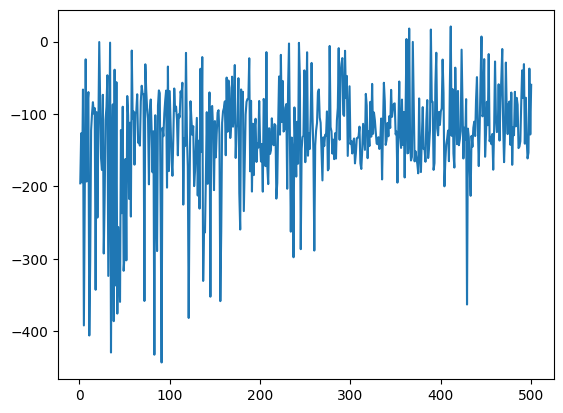

In [6]:
import matplotlib.pyplot as plt

plt.plot(np.linspace(1, len(rewards), len(rewards), dtype=np.int64), rewards)
plt.show()